# Delhivery Case Study

# install seaborn and import libraries

In [119]:
%pip install seaborn

In [120]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import shapiro,levene,kruskal,mannwhitneyu
from statsmodels.graphics.gofplots import qqplot

In [121]:
import seaborn as sns

# Load dataset as df

In [122]:
df = pd.read_csv('delhivery_data.csv')

In [123]:
df.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111


## check the shape of data

In [124]:
df.shape

(144867, 24)

## Analyze the structure of dataset. What datatype is in the column. 

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

## Now we check how many null values there are and in which columns.

In [126]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

## total % of null values in my dataset

In [127]:
sum(df.isna().sum()/df.shape[0])*100 

0.3824197367240296

### The dataset has 2 columns, "source_name" and "destination_name", Which have  null values. That is less than 1% of all data,
### There are 2 way to handle: 
### 1. we fill null data with mode value. 
### 2. drop that rows
### If we fill with mode value. After that source name have two source_center value. Or either we change source_center ID which is the worng way.
### So we go with first option. And drop all that rows.

In [128]:
df = df.dropna()
df.shape                    # now we have only 144316 rows.

(144316, 24)

### check aggeregated values of numerical and cetegorical columns of dataset.

In [129]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,233.561345,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
std,1038.082976,345.245823,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,161.000000,22.000000,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,451.000000,66.000000,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,1645.000000,286.000000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


In [130]:
df.describe(include='object')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316
unique,2,14787,1497,2,14787,1496,1496,1466,1466,26223,26223,92894
top,training,2018-10-01 05:04:55.268931,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104632,101,1812,99132,101,23267,23267,15192,15192,81,81,39


### there are some columns about which we dont have any information. so we drop them.

In [131]:
df = df.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'])

In [132]:
df.shape  #..... now we have 19 columns

(144316, 19)

In [133]:
df.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590


### For the further step we have to correct data tpye of time columns

In [134]:
# we change datetime column string to datetime datatype
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

### now we group by the data with 3 columns (trip_uuid,source_center,destination_center) and merge the rows. 

In [136]:
# now we use cumulative sum funtion on particular columns.
# sample_data = df.groupby(by=['trip_uuid','source_center','destination_center'])[['segment_actual_time','segment_osrm_distance','segment_osrm_time']].cumsum()
# df['cum_segment_actual_time'] = sample_data['segment_actual_time']
# df['cum_segment_osrm_distance'] = sample_data['segment_osrm_distance']
# df['cum_segment_osrm_time'] = sample_data['segment_osrm_time']

In [137]:
dict1 = {
                    'trip_creation_time':'first',
                    'source_name':'first',
                    'destination_name':'first',
                    'route_type':'first',
                    'od_end_time':'last',
                    'start_scan_to_end_scan':'last',
                    'actual_distance_to_destination':'last',
                    'actual_time':'last',
                    'osrm_time':'last',
                    'osrm_distance':'last',
                    'segment_actual_time':'sum',
                    'segment_osrm_time':'sum',
                    'segment_osrm_distance':'sum'
                        }

In [138]:
df.sort_values(by=['trip_uuid','source_center','destination_center','od_end_time'],ascending=True,inplace=True)

In [139]:
data = df.groupby(by=['trip_uuid','source_center','destination_center','od_start_time'],sort=False).aggregate(dict1)
data.reset_index(inplace=True)

In [140]:
data.shape

(26223, 17)

### Get extra Feature Sate names form source and destination as source_state and destination_state.

In [141]:
def get_state(n):
    try:
        math.isnan(n)==True
        return n
    except:
        ss = n.split('(')
        state = ss[1].replace(')','')
        return state

In [142]:
data['source_state'] = data['source_name'].apply(get_state)
data['destination_state'] = data['destination_name'].apply(get_state)

In [143]:
data.head(5)

,trip_uuid,source_center,destination_center,od_start_time,trip_creation_time,source_name,destination_name,route_type,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,destination_state
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 16:39:46.858469,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,Uttar Pradesh,Haryana
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,Madhya Pradesh,Uttar Pradesh
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 02:03:09.655591,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,Karnataka,Karnataka
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,Karnataka,Karnataka
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-14 03:40:17.106733,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),FTL,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,Haryana,Punjab


In [144]:
data.shape

(26223, 19)

### getting Day, Month, year from trip_creation_time

In [145]:
data['od_year'] = data['trip_creation_time'].apply(lambda x: x.year)
data['od_month'] = data['trip_creation_time'].apply(lambda x: x.month)
data['od_day'] = data['trip_creation_time'].apply(lambda x: x.day)

In [146]:
data.head(2)

,trip_uuid,source_center,destination_center,od_start_time,trip_creation_time,source_name,destination_name,route_type,od_end_time,start_scan_to_end_scan,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,destination_state,od_year,od_month,od_day
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 16:39:46.858469,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-13 13:40:23.123744,1260.0,...,329.0,446.5496,728.0,534.0,670.6205,Uttar Pradesh,Haryana,2018,9,12
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,2018-09-12 16:39:46.858469,999.0,...,388.0,544.8027,820.0,474.0,649.8528,Madhya Pradesh,Uttar Pradesh,2018,9,12


In [147]:
data.shape

(26223, 22)

In [148]:
# time difference between od_start_time and od_end_time

In [149]:
data['time_diff_end_start'] = round((data['od_end_time']-data['od_start_time'])/pd.Timedelta(minutes=1))

In [150]:
data.head(4)

,trip_uuid,source_center,destination_center,od_start_time,trip_creation_time,source_name,destination_name,route_type,od_end_time,start_scan_to_end_scan,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,destination_state,od_year,od_month,od_day,time_diff_end_start
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 16:39:46.858469,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-13 13:40:23.123744,1260.0,...,446.5496,728.0,534.0,670.6205,Uttar Pradesh,Haryana,2018,9,12,1261.0
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,2018-09-12 16:39:46.858469,999.0,...,544.8027,820.0,474.0,649.8528,Madhya Pradesh,Uttar Pradesh,2018,9,12,1000.0
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 02:03:09.655591,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,2018-09-12 03:01:59.598855,58.0,...,28.1994,46.0,26.0,28.1995,Karnataka,Karnataka,2018,9,12,59.0
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,2018-09-12 02:03:09.655591,122.0,...,56.9116,95.0,39.0,55.9899,Karnataka,Karnataka,2018,9,12,123.0


# now we merge rows at trip_uuid so that we have only one row of each trip id 

In [151]:
dict2 = {
                    'trip_creation_time':'first',
                    # 'source_name':'first',
                    # 'destination_name':'first',
                    'route_type':'first',
                    'od_start_time':'first',
                    'od_end_time':'last',
                    'start_scan_to_end_scan':'sum',
                    'actual_distance_to_destination':'sum',
                    'actual_time':'sum',
                    'osrm_time':'sum',
                    'osrm_distance':'sum',
                    'segment_actual_time':'sum',
                    'segment_osrm_time':'sum',
                    'segment_osrm_distance':'sum',
                    'time_diff_end_start':'sum',
                    'source_state':'first',
                    'destination_state':'first',
                    'od_year':'first',
                    'od_month':'first',
                    'od_day':'first'
                        }

In [152]:
data.groupby(by='trip_uuid').aggregate(dict2).head(5)

,trip_creation_time,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,time_diff_end_start,source_state,destination_state,od_year,od_month,od_day
trip_uuid,,,,,,,,,,,,,,,,,,
trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2261.0,Uttar Pradesh,Haryana,2018,9,12
trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,182.0,Karnataka,Karnataka,2018,9,12
trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3935.0,Haryana,Punjab,2018,9,12
trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,100.0,Maharashtra,Maharashtra,2018,9,12
trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,719.0,Karnataka,Karnataka,2018,9,12


# In-depth analysis and feature engineering

### Compare the difference between  actual_time aggregated value and  OSRM time aggregated value. Do hypothesis testing/ Visual analysis to check.

In [153]:
data['actual_time'].mean(),data['osrm_time'].mean()

(200.92468443732602, 90.78293864165046)

In [154]:
# means are not near to each other so check the data distribution. with Histogram plot

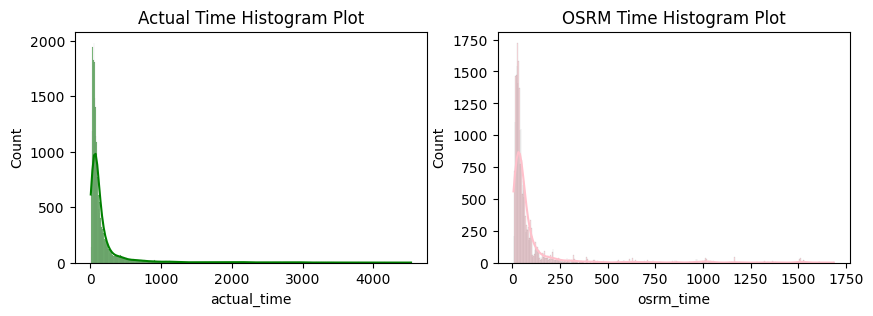

In [155]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
sns.histplot(data['actual_time'],kde=True,ax=ax[0],color='green')
sns.histplot(data['osrm_time'],kde=True,ax=ax[1],color='pink')
ax[0].title.set_text("Actual Time Histogram Plot")
ax[1].title.set_text("OSRM Time Histogram Plot")
plt.show()

In [156]:
# both columns are numerical columns so we can do ttest but first we check assumption
# some assumption for 2 sample ttest :
# 1. both sample are independents
# 2. each group are normally distributed.
# 3. variance of each group are equal.

In [157]:
# check samples are normally distribution or not. by qqplot and shapiro test.

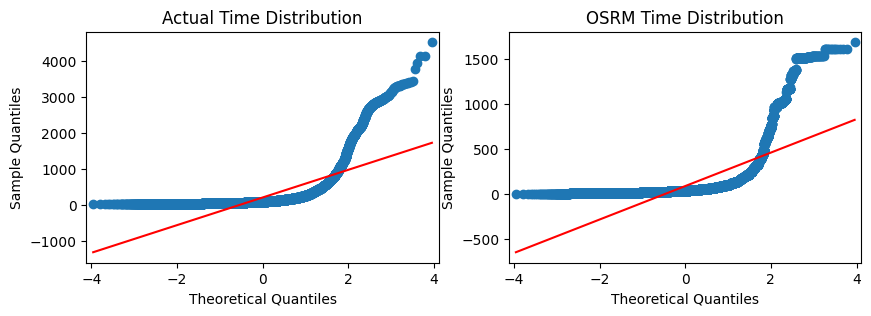

In [158]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
qqplot(data['actual_time'],line='s',ax=ax[0])
qqplot(data['osrm_time'],line='s',ax=ax[1])
ax[0].title.set_text("Actual Time Distribution")
ax[1].title.set_text("OSRM Time Distribution")
plt.show()

In [159]:
# we also check with one test which is shapiro test. This test give good result if my sample size is 100 to 200.
# H0 = sample is gaussian distribution
# Ha = sample is not gaussian distribution
# alpha is .05
sample_actual_time = data['actual_time'].sample(200)
shapiro(sample_actual_time)

ShapiroResult(statistic=0.37094563245773315, pvalue=7.351514337485557e-26)

In [160]:
sample_osrm_time = data['osrm_time'].sample(200)
shapiro(sample_osrm_time)

ShapiroResult(statistic=0.4572520852088928, pvalue=2.490874259383074e-24)

In [161]:
# in the above plots and tests we found that both samples are not belong to normally (gaussian) distribution.

In [162]:
# Now we check variance of sample with levene test.
# H0 = samples are equal variance
# Ha = samples are different variance
# alpha is .05
levene(data['actual_time'],data['osrm_time'])

LeveneResult(statistic=1054.0177129836577, pvalue=6.123611191892272e-229)

In [163]:
# all assumptions are failed so now we go with the "Kruskal" test which is used for Nonparametric Statistical Hypothesis Tests.
# H0 : sample distribution are same.
# Ha = sample distribution are diffferent

In [164]:
kruskal(data['actual_time'],data['osrm_time'])

KruskalResult(statistic=9158.052256647881, pvalue=0.0)

In [165]:
# as we see our pvalue is 0 which is less than alpha so we reject our null hypothesis. we say that both distributions are different

## Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [166]:
data['actual_time'].mean(), data['segment_actual_time'].mean()

(200.92468443732602, 199.08805247301987)

In [167]:
# first we check the data distribution with the help of histplot.

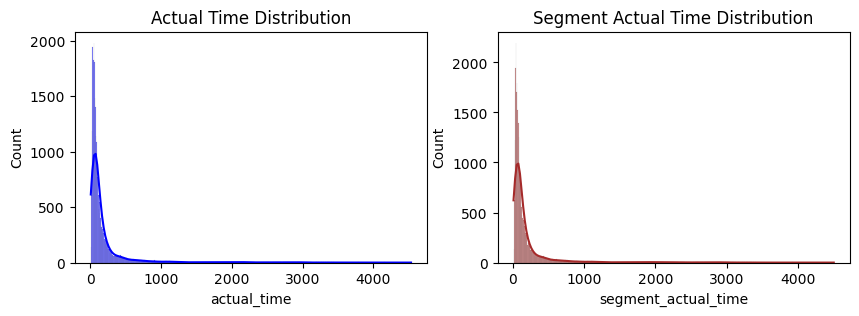

In [168]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
sns.histplot(data['actual_time'],kde=True,color='blue',ax=ax[0])
sns.histplot(data['segment_actual_time'],kde=True,color='brown',ax=ax[1])
ax[0].title.set_text("Actual Time Distribution")
ax[1].title.set_text("Segment Actual Time Distribution")
plt.show()

In [169]:
# we also check that samples are gaussian distribution or not with QQplot 

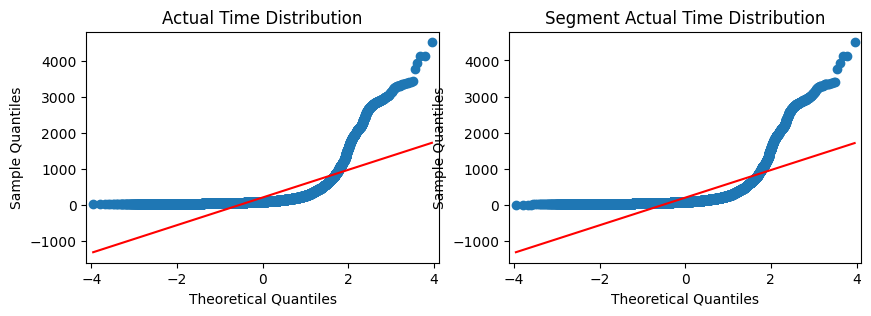

In [170]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
qqplot(data['actual_time'],line='s',ax=ax[0])
qqplot(data['segment_actual_time'],line='s',ax=ax[1])
ax[0].title.set_text("Actual Time Distribution")
ax[1].title.set_text("Segment Actual Time Distribution")
plt.show()

In [171]:
# At visulization we say that they are not normally distributed.
# we also check with hypothetically test this data

In [172]:
# H0 : sample is gaussian distribution
# Ha : sample is not gaussian distribution

In [173]:
shapiro(data['actual_time'].sample(200))

ShapiroResult(statistic=0.45935940742492676, pvalue=2.7290690347775217e-24)

In [174]:
shapiro(data['segment_actual_time'].sample(200))

ShapiroResult(statistic=0.39593034982681274, pvalue=1.9565909956209135e-25)

In [175]:
# both pvalues are less than alpha values so we reject our null hypothesis.

In [176]:
# check the variance of the samples with levene test

In [177]:
# H0 : samples have equal variance
# Ha : samples have not equal variance
levene(data['actual_time'],data['segment_actual_time'])

LeveneResult(statistic=0.15068313542409986, pvalue=0.6978849582495777)

In [178]:
# pvalue is greater than alpha so we accept our H0[Null hypothesis]

In [179]:
# so 2 sample ttest will not give correct result so we do kruskal test

In [180]:
# H0 : sample distribution are same
# Ha : sample distribution are different
# alpha = .05

In [181]:
kruskal(data['actual_time'],data['segment_actual_time'])

KruskalResult(statistic=1.9762803642029143, pvalue=0.1597828116932615)

In [182]:
# we say that actual_time and segment_actual_time both colums are approx same distribution

# Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [183]:
data['osrm_distance'].mean(),data['segment_osrm_distance'].mean()

(114.97239355146246, 125.58234116233841)

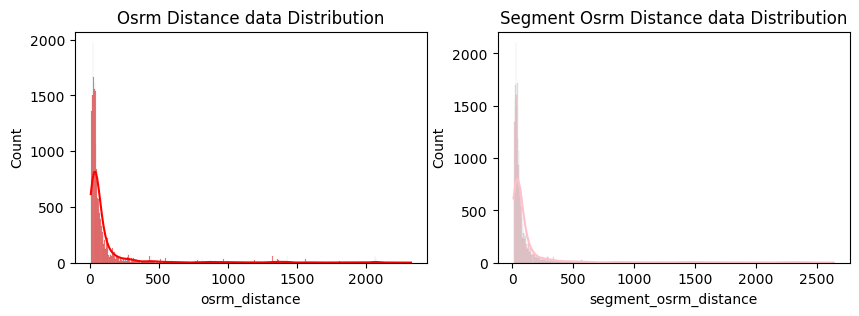

In [184]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
sns.histplot(data['osrm_distance'],kde=True,color='red',ax=ax[0])
sns.histplot(data['segment_osrm_distance'],kde=True,color='pink',ax=ax[1])
ax[0].title.set_text("Osrm Distance data Distribution")
ax[1].title.set_text("Segment Osrm Distance data Distribution")
plt.show()

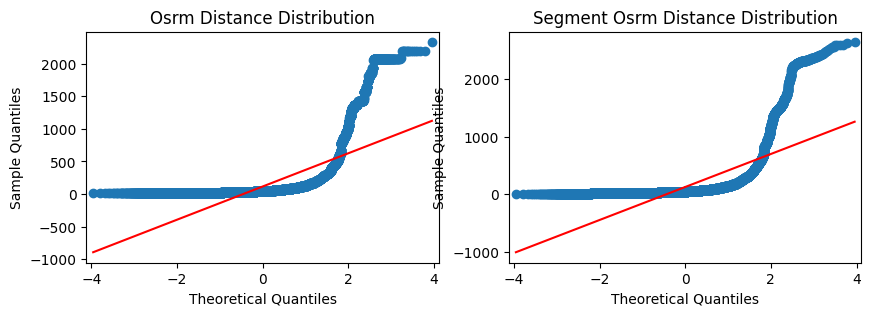

In [185]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
qqplot(data['osrm_distance'],line='s',ax=ax[0])
qqplot(data['segment_osrm_distance'],line='s',ax=ax[1])
ax[0].title.set_text("Osrm Distance Distribution")
ax[1].title.set_text("Segment Osrm Distance Distribution")
plt.show()

In [186]:
# At visulization we say that they are not normally distributed.
# we also check with hypothetically test this data

In [187]:
# do shapiro test to check sample are gaussian distribution or not.

In [188]:
# H0 : sample is gaussian distribution
# Ha : sample is not gaussian distribution
# alpha = .05

In [189]:
shapiro(data['osrm_distance'].sample(200))

ShapiroResult(statistic=0.3777279257774353, pvalue=9.559954477257485e-26)

In [190]:
shapiro(data['segment_osrm_distance'].sample(200))

ShapiroResult(statistic=0.33888739347457886, pvalue=2.187079573721532e-26)

In [191]:
# both pvalues are less than alpha values so we reject our null hypothesis.

In [192]:
# Now we check variance of sample with levene test.
# H0 = samples are equal variance
# Ha = samples are different variance
# alpha is .05
levene(data['osrm_distance'],data['segment_osrm_distance'])

LeveneResult(statistic=17.297076996716974, pvalue=3.201861331530369e-05)

In [193]:
# pvalue is less than alpha so we reject our H0[Null hypothesis]

In [194]:
# H0 : sample distribution are same
# Ha : sample distribution are different
# alpha = .05

In [195]:
kruskal(data['osrm_distance'],data['segment_osrm_distance'])

KruskalResult(statistic=38.80433634940333, pvalue=4.684859634144637e-10)

In [196]:
# pvalue is less than alpha so we reject our H0[Null hypothesis] OR
 # we say that both columns have different distributions 

# Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [197]:
data['osrm_time'].mean(),data['segment_osrm_time'].mean()

(90.78293864165046, 101.78945963467186)

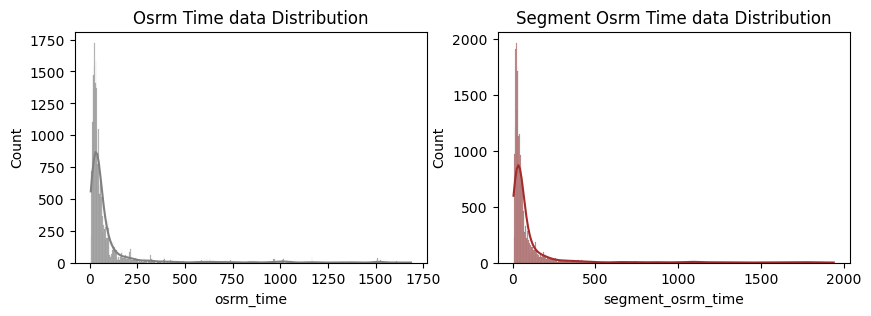

In [198]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
sns.histplot(data['osrm_time'],kde=True,color='gray',ax=ax[0])
sns.histplot(data['segment_osrm_time'],kde=True,color='brown',ax=ax[1])
ax[0].title.set_text("Osrm Time data Distribution")
ax[1].title.set_text("Segment Osrm Time data Distribution")
plt.show()

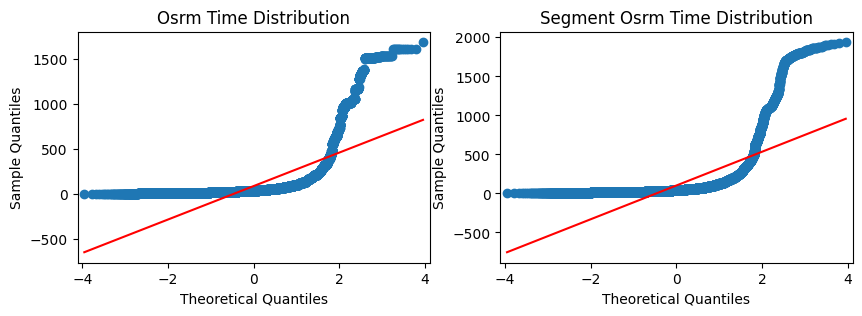

In [199]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
qqplot(data['osrm_time'],line='s',ax=ax[0])
qqplot(data['segment_osrm_time'],line='s',ax=ax[1])
ax[0].title.set_text("Osrm Time Distribution")
ax[1].title.set_text("Segment Osrm Time Distribution")
plt.show()

In [200]:
# At visulization we say that they are not normally distributed.
# we also check with hypothetically test this data

In [201]:
# do shapiro test to check sample are gaussian distribution or not.

In [202]:
# H0 : sample is gaussian distribution
# Ha : sample is not gaussian distribution
# alpha = .05

In [203]:
shapiro(data['osrm_time'].sample(200))

ShapiroResult(statistic=0.41685569286346436, pvalue=4.552627710633322e-25)

In [204]:
shapiro(data['segment_osrm_time'].sample(200))

ShapiroResult(statistic=0.46290022134780884, pvalue=3.1836609782485765e-24)

In [205]:
# Now we check variance of sample with levene test.
# H0 = samples are equal variance
# Ha = samples are different variance
# alpha is .05
levene(data['osrm_time'],data['segment_osrm_time'])

LeveneResult(statistic=36.570820016298626, pvalue=1.4821132262801968e-09)

In [206]:
# pvalue is less than alpha so we reject our H0[Null hypothesis]

In [207]:
# H0 : sample distribution are same
# Ha : sample distribution are different
# alpha = .05

In [208]:
kruskal(data['osrm_time'],data['segment_osrm_time'])

KruskalResult(statistic=44.0280839785034, pvalue=3.2369798553850024e-11)

In [209]:
# pvalue is less than alpha so we reject our H0[Null hypothesis] OR
 # we say that both columns have different distributions 

# Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

In [210]:
data['od_month'] = data['od_month'].astype('category')
data['od_year'] = data['od_year'].astype('category')
data['od_day'] = data['od_day'].astype('category')

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26223 entries, 0 to 26222
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       26223 non-null  object        
 1   source_center                   26223 non-null  object        
 2   destination_center              26223 non-null  object        
 3   od_start_time                   26223 non-null  datetime64[ns]
 4   trip_creation_time              26223 non-null  datetime64[ns]
 5   source_name                     26223 non-null  object        
 6   destination_name                26223 non-null  object        
 7   route_type                      26223 non-null  object        
 8   od_end_time                     26223 non-null  datetime64[ns]
 9   start_scan_to_end_scan          26223 non-null  float64       
 10  actual_distance_to_destination  26223 non-null  float64       
 11  ac

In [212]:
numerical_col = data.describe().columns

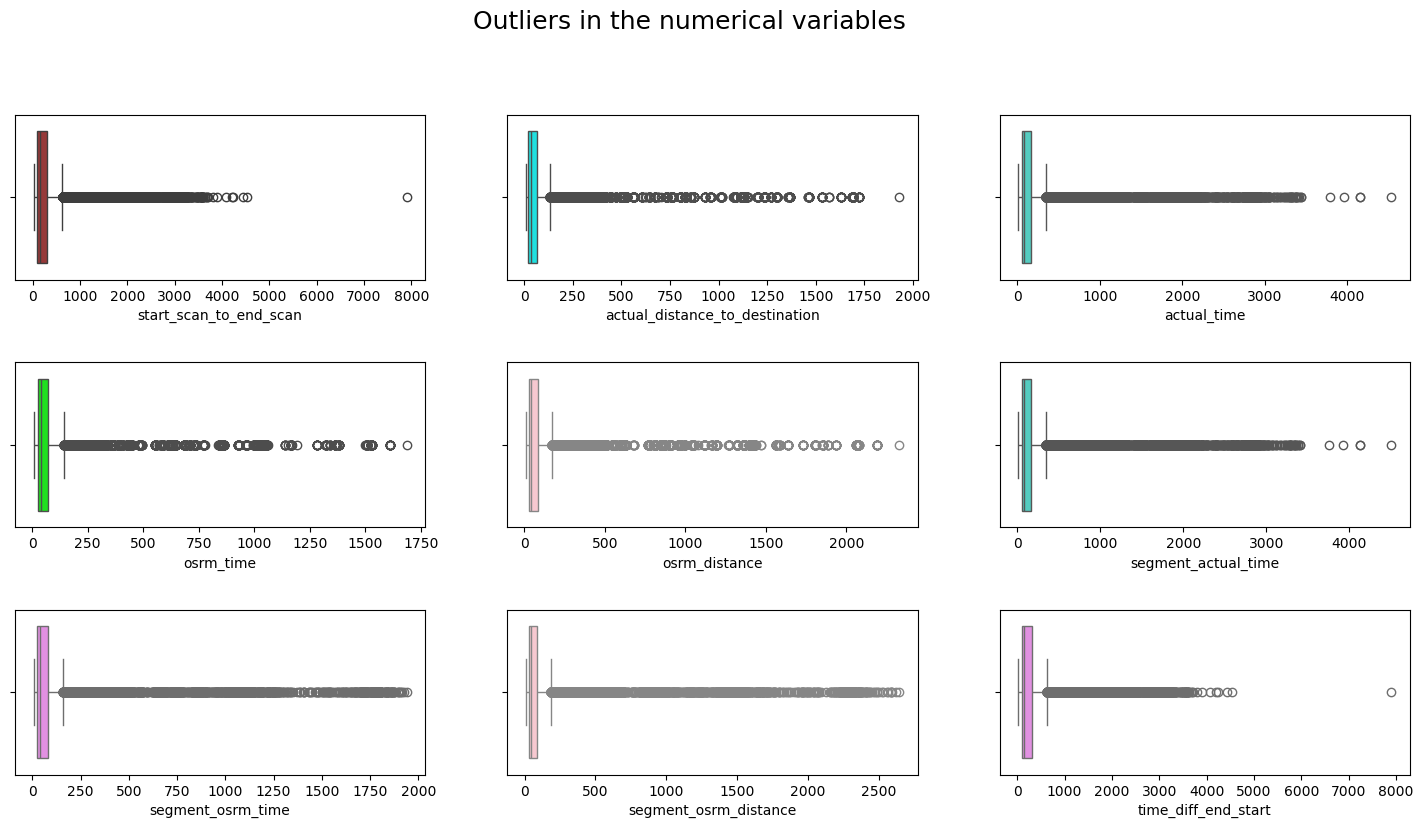

In [213]:
plt.figure(figsize=(18, 15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Outliers in the numerical variables", fontsize=18, y=0.95)
color_name = ['pink','red','brown','green','turquoise','violet','cyan','lime']
for i in range(len(numerical_col)):
    ax = plt.subplot(5,3,i+1)
    sns.boxplot(x=data[numerical_col[i]],ax=ax,color=np.random.choice(color_name))

In [214]:
for i in numerical_col:
    q1 = np.round(np.quantile(data[i],.25),2)
    q3 = np.round(np.quantile(data[i],.75),2)
    iqr = np.round((q3-q1),2)
    up_whisker = np.round((q3+(iqr*1.5)),2)
    lr_whisker = np.round((q1-(iqr*1.5)),2)
    print(i,"\n","Q1------>",q1,"\n","Q3------>",q3,"\n","IQR---->",iqr,"\n","up_whisker------->",up_whisker,"\n","lr_whisker------>",lr_whisker)
    # print(len(data[]))
    print("\n")

start_scan_to_end_scan 
 Q1------> 90.0 
 Q3------> 307.0 
 IQR----> 217.0 
 up_whisker-------> 632.5 
 lr_whisker------> -235.5


actual_distance_to_destination 
 Q1------> 21.65 
 Q3------> 65.56 
 IQR----> 43.91 
 up_whisker-------> 131.43 
 lr_whisker------> -44.22


actual_time 
 Q1------> 51.0 
 Q3------> 167.0 
 IQR----> 116.0 
 up_whisker-------> 341.0 
 lr_whisker------> -123.0


osrm_time 
 Q1------> 25.0 
 Q3------> 72.0 
 IQR----> 47.0 
 up_whisker-------> 142.5 
 lr_whisker------> -45.5


osrm_distance 
 Q1------> 27.72 
 Q3------> 85.44 
 IQR----> 57.72 
 up_whisker-------> 172.02 
 lr_whisker------> -58.86


segment_actual_time 
 Q1------> 50.0 
 Q3------> 166.0 
 IQR----> 116.0 
 up_whisker-------> 340.0 
 lr_whisker------> -124.0


segment_osrm_time 
 Q1------> 25.0 
 Q3------> 79.0 
 IQR----> 54.0 
 up_whisker-------> 160.0 
 lr_whisker------> -56.0


segment_osrm_distance 
 Q1------> 28.43 
 Q3------> 91.02 
 IQR----> 62.59 
 up_whisker-------> 184.9 
 lr_whisker----

In [215]:
data.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,time_diff_end_start
count,26223.000000,26223.000000,26223.000000,26223.000000,26223.000000,26223.000000,26223.000000,26223.000000,26223.000000
mean,298.549746,92.530889,200.924684,90.782939,114.972394,199.088052,101.789460,125.582341,299.049613
std,441.108800,209.948644,385.723676,185.551226,254.422062,382.142650,216.199387,286.665471,441.110344
min,20.000000,9.001351,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,21.000000
25%,90.000000,21.654462,51.000000,25.000000,27.719800,50.000000,25.000000,28.429200,91.000000
50%,152.000000,35.045670,84.000000,39.000000,43.542300,83.000000,42.000000,45.796300,152.000000
75%,307.000000,65.556886,167.000000,72.000000,85.440000,166.000000,79.000000,91.020750,307.000000
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,4504.000000,1938.000000,2640.924700,7899.000000


In [216]:
data.describe().columns

Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'time_diff_end_start'],
      dtype='object')

### OHE(one hot encoding)
### Do one-hot encoding of categorical variables (like route_type)

In [217]:
data['route_type'].value_counts()

FTL        13799
Carting    12424
Name: route_type, dtype: int64

In [218]:
from sklearn.preprocessing import LabelEncoder

In [219]:
label_encoder = LabelEncoder()

In [220]:
data['route_type'] = label_encoder.fit_transform(data['route_type'])
data['route_type'].value_counts()

1    13799
0    12424
Name: route_type, dtype: int64

In [235]:
# FTL==1 OR Carting==0

### 	Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler. 

In [221]:
from sklearn.preprocessing import MinMaxScaler

In [222]:
scaler= MinMaxScaler()
data['MMScaler_start_scan_to_end_scan'] = scaler.fit_transform(data['start_scan_to_end_scan'].to_numpy().reshape(-1,1)) 

In [223]:
data['MMScaler_actual_distance_to_destination'] = scaler.fit_transform(data['actual_distance_to_destination'].to_numpy().reshape(-1,1)) 
data['MMScaler_osrm_time'] = scaler.fit_transform(data['osrm_time'].to_numpy().reshape(-1,1)) 
data['MMScaler_actual_time'] = scaler.fit_transform(data['actual_time'].to_numpy().reshape(-1,1)) 
data['MMScaler_osrm_distance'] = scaler.fit_transform(data['osrm_distance'].to_numpy().reshape(-1,1)) 
data['MMScaler_segment_actual_time'] = scaler.fit_transform(data['segment_actual_time'].to_numpy().reshape(-1,1)) 
data['MMScaler_segment_osrm_time'] = scaler.fit_transform(data['segment_osrm_time'].to_numpy().reshape(-1,1)) 
data['MMScaler_segment_osrm_distance'] = scaler.fit_transform(data['segment_osrm_distance'].to_numpy().reshape(-1,1)) 
data['MMScaler_time_diff_end_start'] = scaler.fit_transform(data['time_diff_end_start'].to_numpy().reshape(-1,1)) 

In [224]:
data.shape

(26223, 32)

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
scaler= StandardScaler()
data['SScaler_start_scan_to_end_scan'] = scaler.fit_transform(data['start_scan_to_end_scan'].to_numpy().reshape(-1,1)) 
data['SScaler_actual_distance_to_destination'] = scaler.fit_transform(data['actual_distance_to_destination'].to_numpy().reshape(-1,1)) 
data['SScaler_osrm_time'] = scaler.fit_transform(data['osrm_time'].to_numpy().reshape(-1,1)) 
data['SScaler_actual_time'] = scaler.fit_transform(data['actual_time'].to_numpy().reshape(-1,1)) 
data['SScaler_osrm_distance'] = scaler.fit_transform(data['osrm_distance'].to_numpy().reshape(-1,1)) 
data['SScaler_segment_actual_time'] = scaler.fit_transform(data['segment_actual_time'].to_numpy().reshape(-1,1)) 
data['SScaler_segment_osrm_time'] = scaler.fit_transform(data['segment_osrm_time'].to_numpy().reshape(-1,1)) 
data['SScaler_segment_osrm_distance'] = scaler.fit_transform(data['segment_osrm_distance'].to_numpy().reshape(-1,1)) 
data['SScaler_time_diff_end_start'] = scaler.fit_transform(data['time_diff_end_start'].to_numpy().reshape(-1,1)) 

In [227]:
data.shape

(26223, 41)

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26223 entries, 0 to 26222
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   trip_uuid                                26223 non-null  object        
 1   source_center                            26223 non-null  object        
 2   destination_center                       26223 non-null  object        
 3   od_start_time                            26223 non-null  datetime64[ns]
 4   trip_creation_time                       26223 non-null  datetime64[ns]
 5   source_name                              26223 non-null  object        
 6   destination_name                         26223 non-null  object        
 7   route_type                               26223 non-null  int32         
 8   od_end_time                              26223 non-null  datetime64[ns]
 9   start_scan_to_end_scan                 

# check relation between columns with heatmap and pearson method

<ipython-input-230-beb0f7cc35fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'),annot=True)


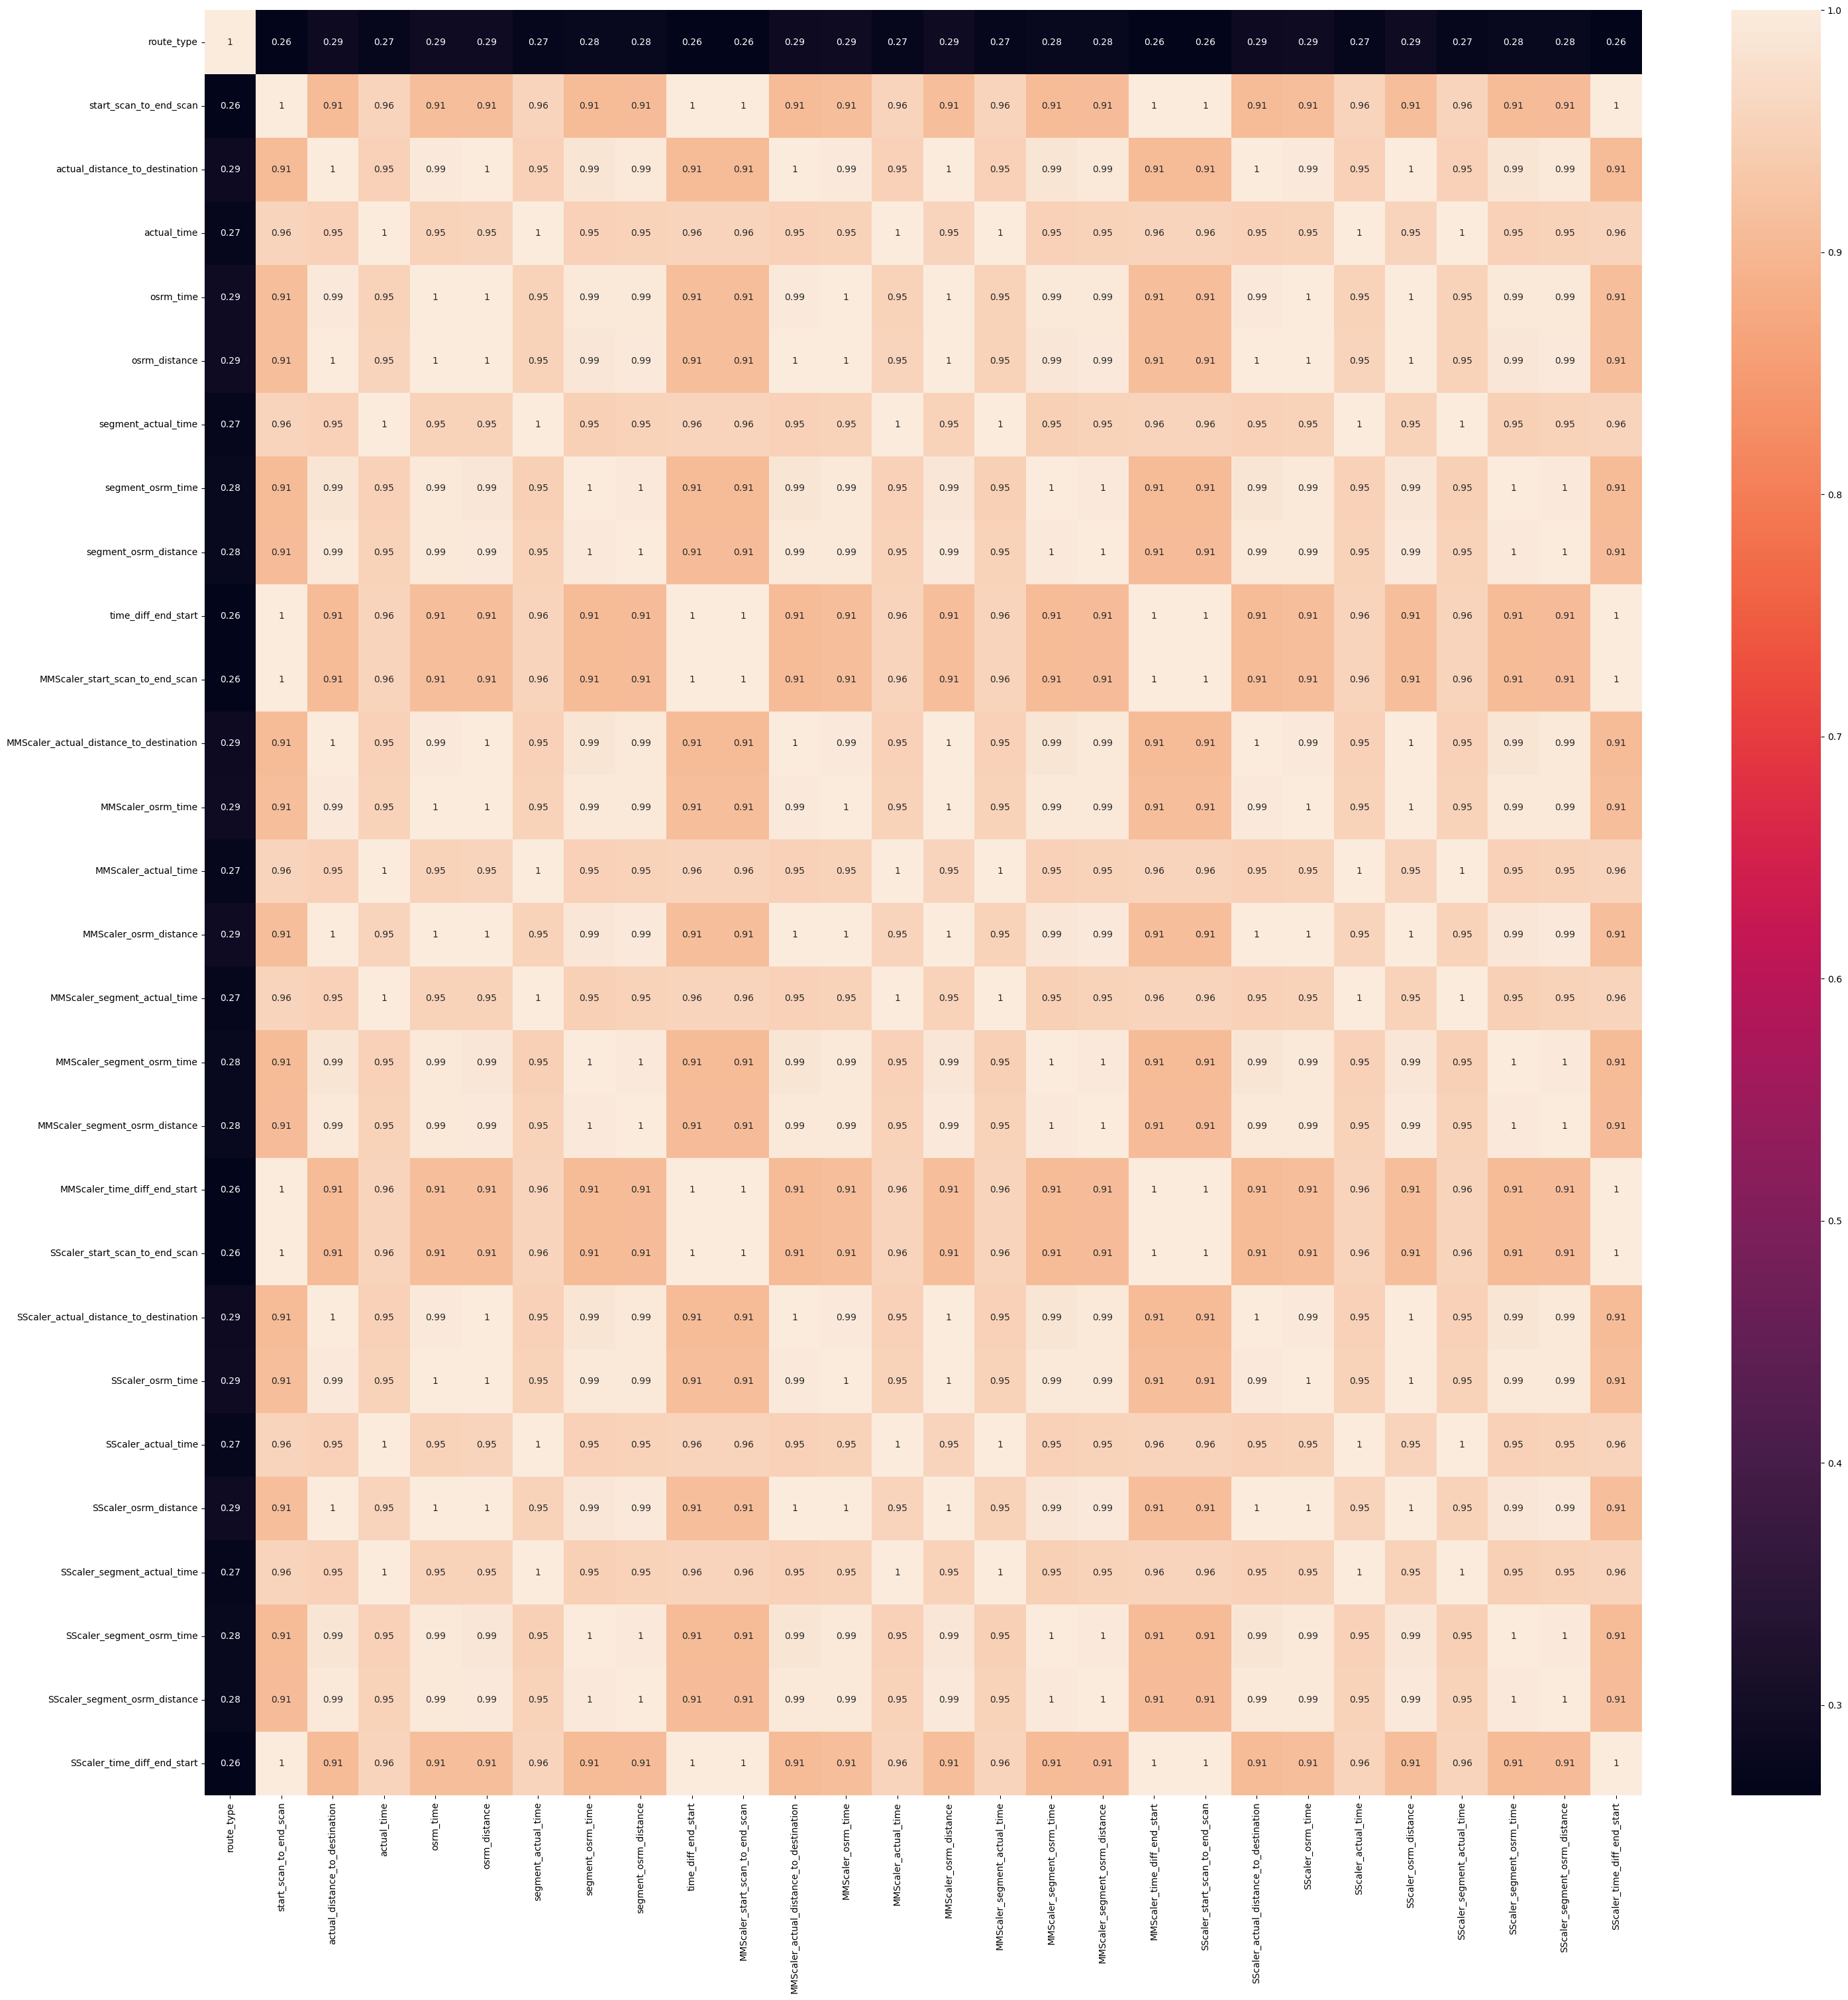

In [230]:
plt.figure(figsize=(35,35))
sns.heatmap(data.corr(method='pearson'),annot=True)
plt.show()

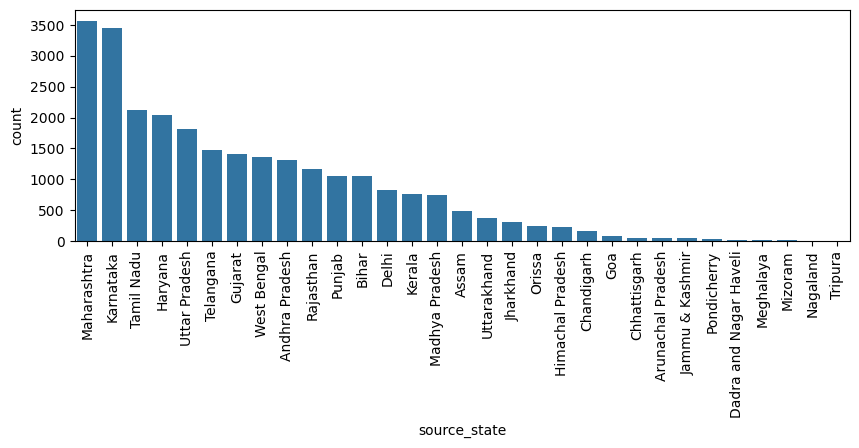

In [231]:
plt.figure(figsize=(10,3))
sns.countplot(x=data['source_state'],order=data['source_state'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

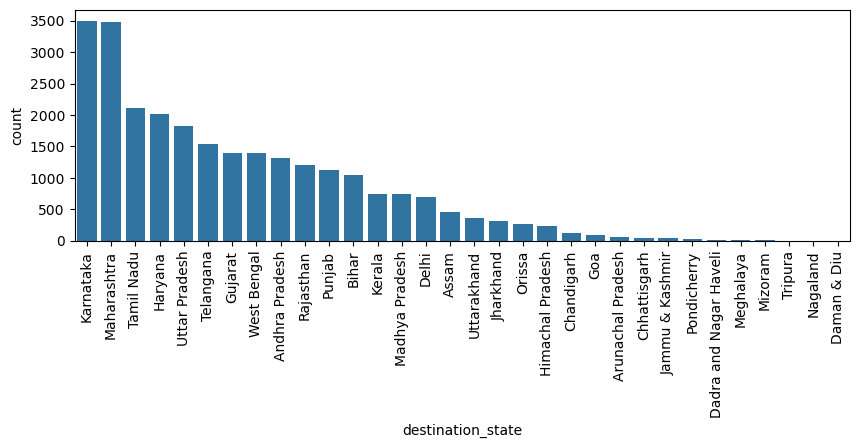

In [232]:
plt.figure(figsize=(10,3))
sns.countplot(x=data['destination_state'],order=data['destination_state'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

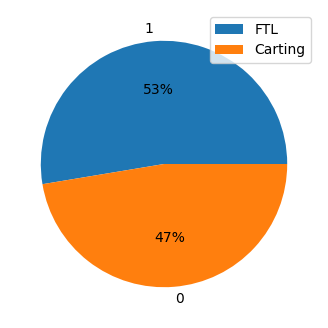

In [247]:
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(4)
plt.pie(data['route_type'].value_counts(),labels=data['route_type'].unique(),autopct='%.0f%%')
plt.legend(['FTL','Carting'])
plt.show()


In [282]:
data['od_month'].value_counts()

9     23055
10     3168
Name: od_month, dtype: int64

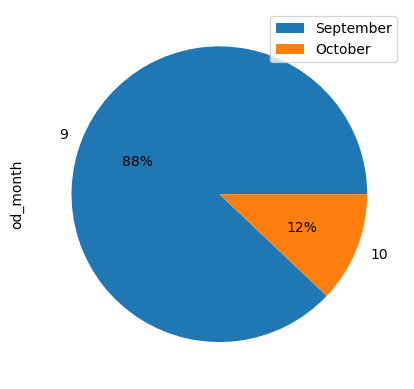

In [283]:
data['od_month'].value_counts().plot(kind='pie',autopct='%.0f%%')
plt.legend(['September','October'])
plt.show()

In [264]:
bins=[1,8,15,22,29]
labels=[1,2,3,4]
data['week_bins'] = pd.cut(data['od_day'],bins=bins,labels=labels)

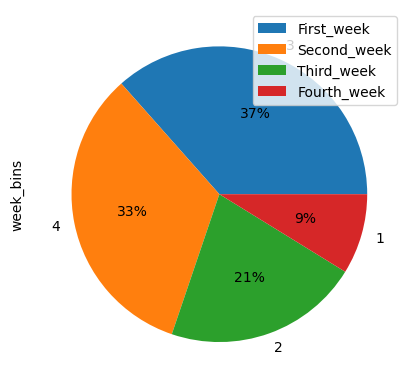

In [285]:
data['week_bins'].value_counts().plot(kind='pie',autopct='%.0f%%')
plt.legend(['First_week','Second_week','Third_week','Fourth_week'])
plt.show()

In [289]:
data.groupby(by=['source_name','destination_name'])['trip_uuid'].count().sort_values()

source_name                          destination_name                  
Tezu_Farmnala_D (Arunachal Pradesh)  Dibrugarh_Bokule_H (Assam)              1
Chennai_Vandalur_Dc (Tamil Nadu)     Chennai_Chrompet_DPC (Tamil Nadu)       1
Muktsar_DPC (Punjab)                 Giddarbaha_DC (Punjab)                  1
                                     Chandigarh_Mehmdpur_H (Punjab)          1
Tiruppattur_KoilStrt_D (Tamil Nadu)  Uthangarai_RgstrOFC_D (Tamil Nadu)      1
                                                                          ... 
Pune_Tathawde_H (Maharashtra)        Bhiwandi_Mankoli_HB (Maharashtra)     107
Bengaluru_KGAirprt_HB (Karnataka)    Bangalore_Nelmngla_H (Karnataka)      108
Bengaluru_Bomsndra_HB (Karnataka)    Bengaluru_KGAirprt_HB (Karnataka)     121
Bangalore_Nelmngla_H (Karnataka)     Bengaluru_Bomsndra_HB (Karnataka)     127
                                     Bengaluru_KGAirprt_HB (Karnataka)     151
Name: trip_uuid, Length: 2741, dtype: int64

In [302]:
data['trip_creation_time'].aggregate(['min','max'])

min   2018-09-12 00:00:16.535741
max   2018-10-03 23:59:42.701692
Name: trip_creation_time, dtype: datetime64[ns]

In [310]:
data[(data['source_center']=='IND562132AAA')&(data['destination_center']=='IND560300AAA')].describe()

,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,time_diff_end_start,...,MMScaler_time_diff_end_start,SScaler_start_scan_to_end_scan,SScaler_actual_distance_to_destination,SScaler_osrm_time,SScaler_actual_time,SScaler_osrm_distance,SScaler_segment_actual_time,SScaler_segment_osrm_time,SScaler_segment_osrm_distance,SScaler_time_diff_end_start
count,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,0.0,183.033113,28.022125,87.874172,48.046358,38.078472,86.682119,51.245033,45.303726,183.562914,...,0.020635,-0.261883,-0.307266,-0.230327,-0.293092,-0.302236,-0.294152,-0.233791,-0.280048,-0.261814
std,0.0,65.103448,0.379592,27.511041,1.297884,0.973222,27.602746,7.783715,7.852305,65.071507,...,0.008260,0.147593,0.001808,0.006995,0.071325,0.003825,0.072233,0.036003,0.027392,0.147520
min,0.0,81.000000,26.363196,50.000000,44.000000,36.420200,49.000000,42.000000,37.983900,82.000000,...,0.007743,-0.493198,-0.315167,-0.252134,-0.391284,-0.308753,-0.392761,-0.276553,-0.305583,-0.492062
25%,0.0,139.000000,27.844727,70.000000,47.000000,37.427000,68.500000,44.000000,41.477850,139.000000,...,0.014978,-0.361708,-0.308111,-0.235966,-0.339433,-0.304796,-0.341732,-0.267302,-0.293395,-0.362840
50%,0.0,176.000000,27.997047,83.000000,48.000000,37.974800,82.000000,51.000000,42.656700,176.000000,...,0.019675,-0.277827,-0.307385,-0.230577,-0.305729,-0.302643,-0.306405,-0.234924,-0.289282,-0.278960
75%,0.0,212.000000,28.208902,100.500000,49.000000,38.439300,99.500000,56.000000,44.987750,213.000000,...,0.024372,-0.196213,-0.306376,-0.225187,-0.260359,-0.300817,-0.260609,-0.211797,-0.281150,-0.195079
max,0.0,559.000000,29.272279,273.000000,52.000000,41.177800,273.000000,84.000000,84.087700,560.000000,...,0.068418,0.590456,-0.301311,-0.209019,0.186861,-0.290053,0.193418,-0.082284,-0.144752,0.591587


In [320]:
data.iloc[:,:18].groupby(by=['source_state'])['osrm_time'].describe()['mean'].sort_values(ascending=False)

source_state
Haryana                   235.914664
Orissa                    157.379032
Jharkhand                 145.511628
Meghalaya                 135.307692
Goa                       127.848837
Tripura                   124.000000
Mizoram                   123.500000
Assam                     109.266529
Madhya Pradesh            107.386486
Maharashtra                95.195792
Karnataka                  90.509434
Uttarakhand                86.964770
Himachal Pradesh           82.300448
Jammu & Kashmir            81.829787
Gujarat                    81.465050
Delhi                      77.954768
Punjab                     76.180608
Nagaland                   74.600000
Telangana                  73.571913
Arunachal Pradesh          70.666667
Chhattisgarh               68.865385
Rajasthan                  68.797762
Bihar                      68.512405
West Bengal                67.239766
Andhra Pradesh             67.128244
Uttar Pradesh              64.047305
Kerala                   

# Business Insights 

- We have the delhivery data form '2018-09-12 00:00:16.535741' to  '2018-10-03 23:59:42.701692'.
- dataset have 144867 rows and 24 columns. And there are 551 rows which have null values.
- most common route is carting which has most trip.
- Most busiest route is 'Bangalore_Nelmngla_H (Karnataka)'['IND562132AAA'] to 'Bengaluru_KGAirprt_HB (Karnataka)'['IND560300AAA'] which has 151 trip.
- Most number of orders from source state which is 1.Maharashtra 2.Karnataka 3.Tamil Nadu.
- Most number of orders to destination state which is 1.Karnataka 2.Maharashtra 3.Tamil Nadu.
- September month has the most orders.
- In those months 70% order placed in third and fourth week.
- Order percentage is between FTL and Carting is 53% and 47% respectively.
- Bengaluru have Max Number of order.
- Features actual_time & osrm_time are statitically different.
- Features start_scan_to_end_scan and segment_actual_time are statistically similar.
- Features osrm_distance and segment_osrm_distance are statistically different from each other.
- Both the osrm_time & segment_osrm_time are not statistically same.


# Recommendations

- Most of the orders are coming from/reaching to states like Maharashtra, Karnataka, Haryana and Tamil Nadu. The existing corridors can be further enhanced to improve the penetration in these areas.
- The OSRM trip planning system needs to be improved. Discrepancies need to be catered to for transporters, if the routing engine is configured for optimum results.
- We have to check why avg OSRM time has the high in less orders states.
- Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these atates and to improve customers' buying and delivery experience.